# Part III: Linear Regression

Import libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

from sklearn.preprocessing import OneHotEncoder
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data analysis and data preprocessing

In [71]:
# diamond_data = pd.read_csv('diamond.csv')
#for collab
DATASET_PATH = '/content/drive/MyDrive/UB school work/Fall 23/574 - ML /assignment1/noisy_datasets/diamond.csv'
diamond_data = pd.read_csv(DATASET_PATH)

diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [72]:
print("Shape of the dataset",diamond_data.shape)

Shape of the dataset (53940, 13)


In [73]:
diamond_data.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,53563,52430,52647,52428,53587,53940.000000,53940.000000,53246,52398,52357,52414,52719,52507
unique,52181,276,18,17,18,NaN,NaN,187,127,11443,556,552,378
top,FALSE,0.3,Ideal,G,SI1,NaN,NaN,62,56,MAYBE,FALSE,4.34,2.7
freq,480,2469,19938,10588,12592,NaN,NaN,2163,9377,180,488,422,735
mean,NaN,NaN,NaN,NaN,NaN,39521.990100,2.902669,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5486.892971,1.325985,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,30000.000000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,34780.000000,1.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,39547.500000,2.910000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,44252.000000,4.050000,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

Handling missing entries

In [75]:
#dropping unnecessary columns
diamond_data=diamond_data.drop(columns=['Unnamed: 0', 'average us salary'])

In [76]:
cleaning_columns = diamond_data[['carat', 'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x', 'y', 'z']]

In [77]:
for column in cleaning_columns:
  diamond_data[column] = pd.to_numeric(diamond_data[column], errors='coerce')
diamond_data=diamond_data.dropna()
diamond_data = diamond_data.reset_index()

In [78]:
diamond_data.dtypes

index                                    int64
carat                                  float64
cut                                     object
color                                   object
clarity                                 object
number of diamonds mined (millions)    float64
depth                                  float64
table                                  float64
price                                  float64
x                                      float64
y                                      float64
z                                      float64
dtype: object

Handling mismatched string formats

In [79]:
diamond_data['cut'] = diamond_data['cut'].str.lower()
diamond_data['color'] = diamond_data['color'].str.lower()
diamond_data['clarity'] = diamond_data['clarity'].str.lower()

In [80]:
diamond_data.groupby('cut')['cut'].count()

cut
fair          1469
false            3
good          4393
ideal        19511
maybe            4
premium      12499
true             1
very good    10951
Name: cut, dtype: int64

In [81]:
diamond_data = diamond_data[diamond_data['cut'] != 'false']
diamond_data = diamond_data[diamond_data['cut'] != 'maybe']
diamond_data = diamond_data[diamond_data['cut'] != 'true']

In [82]:
diamond_data.groupby('cut')['cut'].count()

cut
fair          1469
good          4393
ideal        19511
premium      12499
very good    10951
Name: cut, dtype: int64

In [83]:
diamond_data.groupby('color')['color'].count()

color
d         6115
e         8887
f         8633
false        4
g        10248
h         7529
i         4882
j         2517
maybe        5
true         3
Name: color, dtype: int64

In [84]:
diamond_data = diamond_data[diamond_data['color'] != 'false']
diamond_data = diamond_data[diamond_data['color'] != 'maybe']
diamond_data = diamond_data[diamond_data['color'] != 'true']

In [85]:
diamond_data.groupby('color')['color'].count()

color
d     6115
e     8887
f     8633
g    10248
h     7529
i     4882
j     2517
Name: color, dtype: int64

In [86]:
diamond_data.groupby('clarity')['clarity'].count()

clarity
false        2
i1         676
if        1612
si1      11843
si2       8292
vs1       7378
vs2      11096
vvs1      3331
vvs2      4581
Name: clarity, dtype: int64

In [87]:
diamond_data = diamond_data[diamond_data['clarity'] != 'false']

In [88]:
diamond_data.describe()

,index,carat,number of diamonds mined (millions),depth,table,price,x,y,z
count,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000,48809.000000
mean,26977.549079,0.797450,2.901918,61.751191,57.454168,3931.951976,5.729914,5.733458,3.538247
std,15574.699716,0.473513,1.326275,1.433967,2.230631,3989.918432,1.121010,1.144504,0.706727
min,0.000000,0.200000,0.600000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,13489.000000,0.400000,1.750000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26982.000000,0.700000,2.910000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,40486.000000,1.040000,4.050000,62.500000,59.000000,5322.000000,6.540000,6.530000,4.030000
max,53939.000000,5.010000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Handling outliers

In [89]:
numeric_cols = diamond_data._get_numeric_data().columns
numeric_cols=list(numeric_cols)
numeric_cols = numeric_cols[0:8]

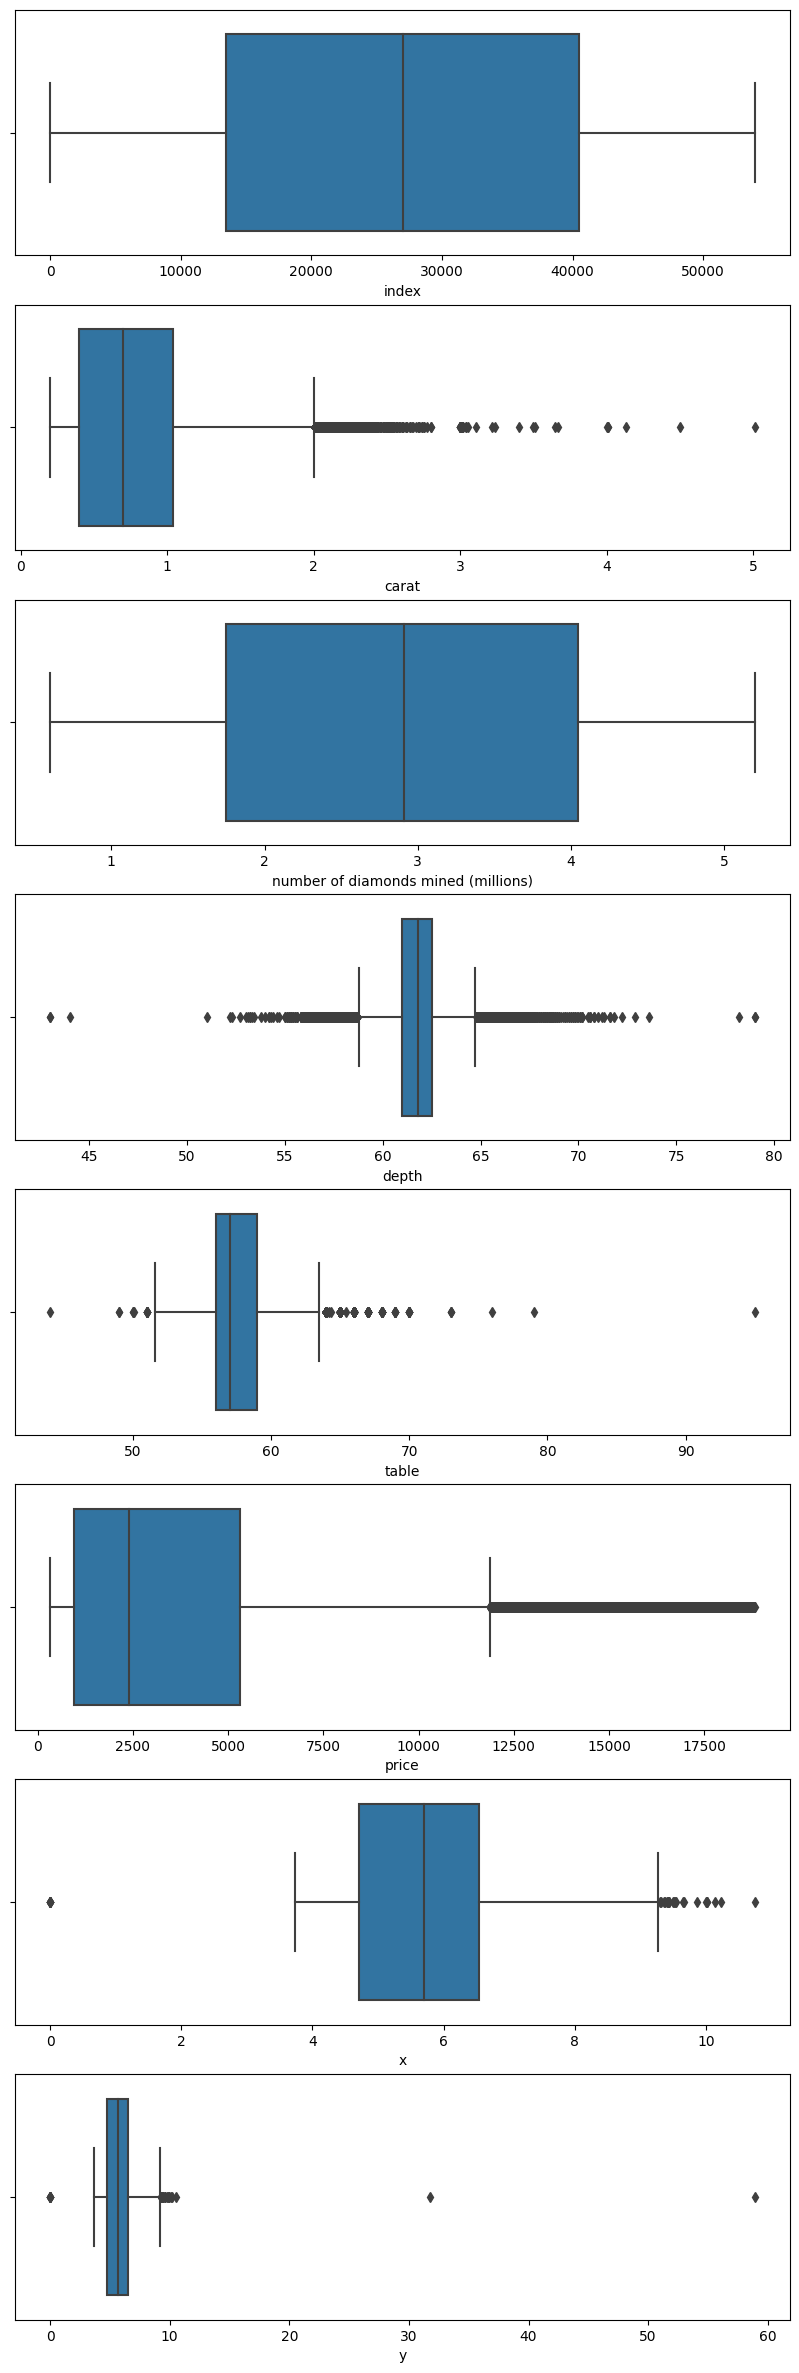

In [90]:
# Box plot each numeric columns to detect outliers
fig, ax = plt.subplots(len(numeric_cols),1, figsize=(10,30))
i=0
for c in (numeric_cols):
  sns.boxplot(x = diamond_data[c], ax = ax[i])
  i+=1

In [91]:
print("Dataset shape", diamond_data.shape)

def remove_outliers(c, df, debug = True):
  q1 = df[c].quantile(0.25)
  q3 = df[c].quantile(0.75)

  iqr = q3 - q1
  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  prev = df.shape[0]


  new_df = df.loc[df[c].between(lower, upper)]
  outliers_count = prev - new_df.shape[0]
  return new_df, outliers_count


for c in numeric_cols:
  diamond_data, count = remove_outliers(c, diamond_data)
  print(f'Detect and removed outliers {count} for column = {c}')

print("Dataset shape after removed outliers")
print(diamond_data.shape)
diamond_data = diamond_data.reset_index()

Dataset shape (48809, 12)
Detect and removed outliers 0 for column = index
Detect and removed outliers 1689 for column = carat
Detect and removed outliers 0 for column = number of diamonds mined (millions)
Detect and removed outliers 2527 for column = depth
Detect and removed outliers 305 for column = table
Detect and removed outliers 2159 for column = price
Detect and removed outliers 4 for column = x
Detect and removed outliers 1 for column = y
Dataset shape after removed outliers
(42124, 12)


Normalization

In [92]:
#normalization (reference: Assignment 0 part 3 question 9)
normalize_columns = ['number of diamonds mined (millions)', 'depth', 'table', 'x', 'y', 'z']
for nc in normalize_columns:
  min = diamond_data[nc].min()
  max = diamond_data[nc].max()
  diamond_data[nc]=(diamond_data[nc]- min)/(max - min)
diamond_data

,level_0,index,carat,cut,color,clarity,number of diamonds mined (millions),depth,table,price,x,y,z
0,0,0,0.23,ideal,e,si2,0.958696,0.446429,0.260870,326.0,0.048458,0.065359,0.076415
1,1,1,0.21,premium,e,si1,0.236957,0.142857,0.782609,326.0,0.035242,0.034858,0.072642
2,3,3,0.29,premium,i,vs2,0.628261,0.607143,0.521739,334.0,0.103524,0.119826,0.082704
3,4,4,0.31,good,j,si2,0.891304,0.767857,0.521739,335.0,0.134361,0.145969,0.086478
4,5,5,0.24,very good,j,vvs2,0.056522,0.678571,0.434783,336.0,0.046256,0.061002,0.077987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42119,48826,53935,0.72,ideal,d,si1,0.639130,0.321429,0.434783,2757.0,0.444934,0.453159,0.110063
42120,48827,53936,0.72,good,d,si1,0.632609,0.732143,0.260870,2757.0,0.431718,0.450980,0.113522
42121,48828,53937,0.70,very good,d,si1,0.580435,0.678571,0.695652,2757.0,0.425110,0.435730,0.111950
42122,48829,53938,0.86,premium,h,si2,0.745652,0.357143,0.521739,2757.0,0.533040,0.531590,0.117610


In [93]:
print(diamond_data.columns)
diamond_data = diamond_data.drop(columns=['level_0'])
diamond_data

Index(['level_0', 'index', 'carat', 'cut', 'color', 'clarity',
       'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')


,index,carat,cut,color,clarity,number of diamonds mined (millions),depth,table,price,x,y,z
0,0,0.23,ideal,e,si2,0.958696,0.446429,0.260870,326.0,0.048458,0.065359,0.076415
1,1,0.21,premium,e,si1,0.236957,0.142857,0.782609,326.0,0.035242,0.034858,0.072642
2,3,0.29,premium,i,vs2,0.628261,0.607143,0.521739,334.0,0.103524,0.119826,0.082704
3,4,0.31,good,j,si2,0.891304,0.767857,0.521739,335.0,0.134361,0.145969,0.086478
4,5,0.24,very good,j,vvs2,0.056522,0.678571,0.434783,336.0,0.046256,0.061002,0.077987
...,...,...,...,...,...,...,...,...,...,...,...,...
42119,53935,0.72,ideal,d,si1,0.639130,0.321429,0.434783,2757.0,0.444934,0.453159,0.110063
42120,53936,0.72,good,d,si1,0.632609,0.732143,0.260870,2757.0,0.431718,0.450980,0.113522
42121,53937,0.70,very good,d,si1,0.580435,0.678571,0.695652,2757.0,0.425110,0.435730,0.111950
42122,53938,0.86,premium,h,si2,0.745652,0.357143,0.521739,2757.0,0.533040,0.531590,0.117610


Correlation Matrix

<ipython-input-94-89b8a97a79d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = diamond_data.corr()
<ipython-input-94-89b8a97a79d6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs_corr_mat = abs(diamond_data.corr())


Text(0.5, 1.0, 'Absolute Correlation')

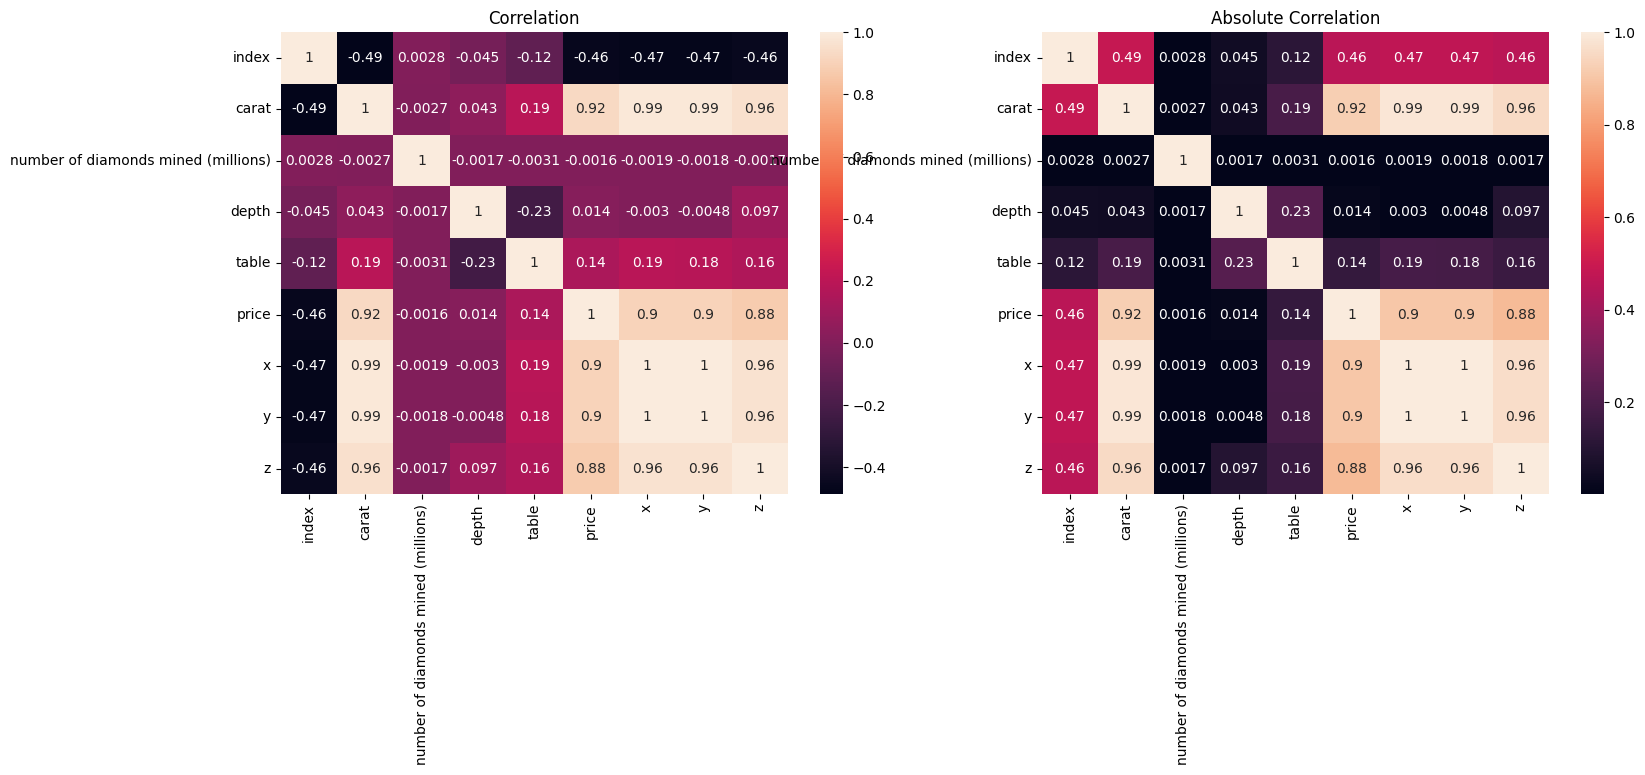

In [94]:
corr_mat = diamond_data.corr()
abs_corr_mat = abs(diamond_data.corr())

fig, ax = plt.subplots(1,2,figsize=(18,6))

sns.heatmap(corr_mat, annot=True, ax = ax[0])
ax[0].set_title("Correlation")
sns.heatmap(abs_corr_mat, annot=True, ax = ax[1])
ax[1].set_title("Absolute Correlation")

In [95]:
pairs = corr_mat.unstack()
print('Head #######')
print(pairs.sort_values(ascending = False).head(15))
print()
print('Tail #######')
print()
pairs.sort_values(ascending = False).tail(5)

Head #######
index                                index                                  1.000000
carat                                carat                                  1.000000
y                                    y                                      1.000000
x                                    x                                      1.000000
price                                price                                  1.000000
depth                                depth                                  1.000000
number of diamonds mined (millions)  number of diamonds mined (millions)    1.000000
table                                table                                  1.000000
z                                    z                                      1.000000
y                                    x                                      0.998472
x                                    y                                      0.998472
carat                                x              

index  x       -0.470409
y      index   -0.471280
index  y       -0.471280
carat  index   -0.487350
index  carat   -0.487350
dtype: float64

Making columns categorical

In [96]:
encoder_cut = OneHotEncoder(sparse=False)
encoder_color = OneHotEncoder(sparse=False)
encoder_clarity = OneHotEncoder(sparse=False)

encoded_cut=encoder_cut.fit_transform(diamond_data[['cut']])
encoded_color=encoder_color.fit_transform(diamond_data[['color']])
encoded_clarity=encoder_clarity.fit_transform(diamond_data[['clarity']])

encoded_cutdf = pd.DataFrame(encoded_cut, columns=encoder_cut.get_feature_names_out(['cut']))
encoded_colordf = pd.DataFrame(encoded_color, columns=encoder_color.get_feature_names_out(['color']))
encoded_claritydf = pd.DataFrame(encoded_clarity, columns=encoder_clarity.get_feature_names_out(['clarity']))

encoded_cutdf = encoded_cutdf.reset_index()
encoded_colordf = encoded_colordf.reset_index()
encoded_claritydf = encoded_claritydf.reset_index()

diamond_data = diamond_data.merge(encoded_cutdf, left_index=True, right_index=True)
diamond_data = diamond_data.merge(encoded_colordf, left_index=True, right_index=True)
diamond_data = diamond_data.merge(encoded_claritydf, left_index=True, right_index=True)
diamond_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-96-79cfdd678c9c>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
 

,index_x,carat,cut,color,clarity,number of diamonds mined (millions),depth,table,price,x,...,color_j,index_y,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0,0.23,ideal,e,si2,0.958696,0.446429,0.260870,326.0,0.048458,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.21,premium,e,si1,0.236957,0.142857,0.782609,326.0,0.035242,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.29,premium,i,vs2,0.628261,0.607143,0.521739,334.0,0.103524,...,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,0.31,good,j,si2,0.891304,0.767857,0.521739,335.0,0.134361,...,1.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0.24,very good,j,vvs2,0.056522,0.678571,0.434783,336.0,0.046256,...,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42119,53935,0.72,ideal,d,si1,0.639130,0.321429,0.434783,2757.0,0.444934,...,0.0,42119,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42120,53936,0.72,good,d,si1,0.632609,0.732143,0.260870,2757.0,0.431718,...,0.0,42120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42121,53937,0.70,very good,d,si1,0.580435,0.678571,0.695652,2757.0,0.425110,...,0.0,42121,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42122,53938,0.86,premium,h,si2,0.745652,0.357143,0.521739,2757.0,0.533040,...,0.0,42122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [97]:
# diamond_data.to_csv('processed_diamond.csv', index=False)

<ipython-input-98-74c009014a49>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diamond_data['carat'],bins=5)


<Axes: xlabel='carat', ylabel='Density'>

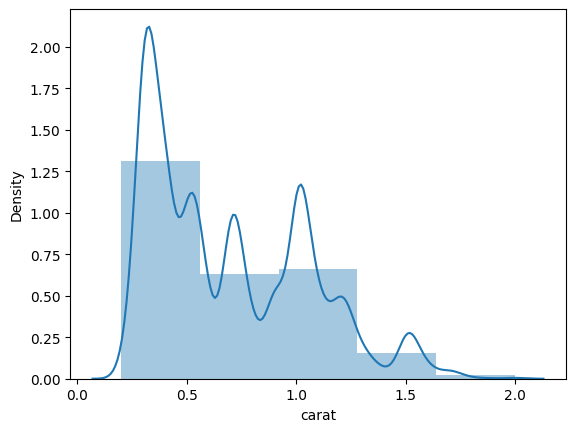

In [98]:
sns.distplot(diamond_data['carat'],bins=5)

Text(0.5, 1.0, 'Average price of diamond on the basis of cut')

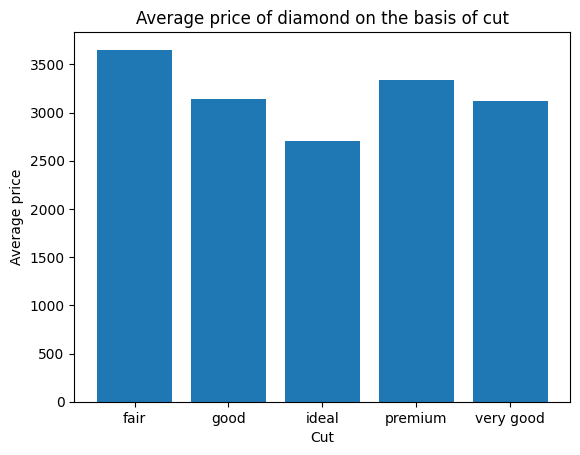

In [99]:
cut_price_df = diamond_data.groupby('cut')['price'].mean().reset_index()
cut_price_df
plt.bar(cut_price_df['cut'], cut_price_df['price'])
plt.xlabel("Cut")
plt.ylabel("Average price")
plt.title("Average price of diamond on the basis of cut")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


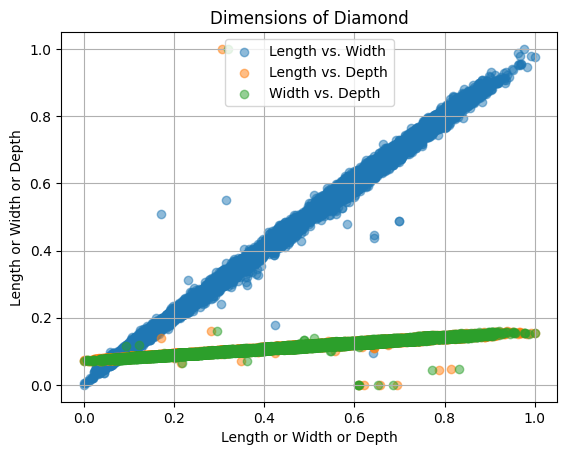

In [100]:
plt.scatter(diamond_data['x'], diamond_data['y'], label='Length vs. Width', alpha=0.5)
plt.scatter(diamond_data['x'], diamond_data['z'], label='Length vs. Depth', alpha=0.5)
plt.scatter(diamond_data['y'], diamond_data['z'], label='Width vs. Depth', alpha=0.5)
plt.xlabel('Length or Width or Depth')
plt.ylabel('Length or Width or Depth')
plt.legend()
plt.title('Dimensions of Diamond')
plt.grid()
plt.show()

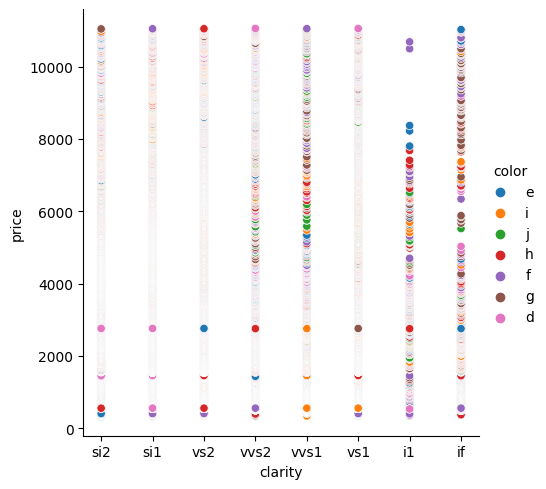

In [101]:
sns.relplot(x='clarity',y='price',hue='color',data=diamond_data)

<Axes: xlabel='clarity', ylabel='price'>

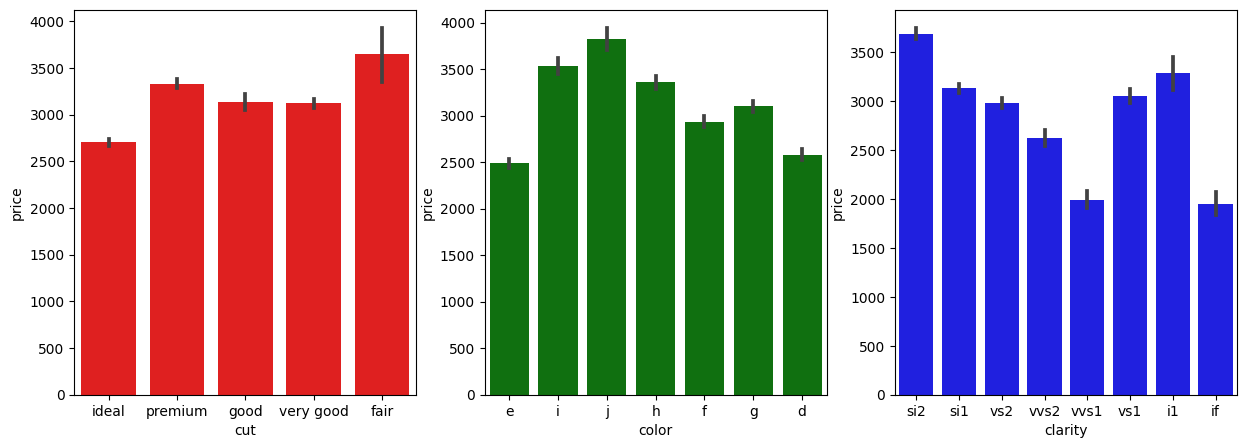

In [102]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x="cut", y="price", data=diamond_data, ax = ax[0], color="red")
sns.barplot(x="color", y="price", data=diamond_data, ax = ax[1], color="green")
sns.barplot(x="clarity", y="price", data=diamond_data, ax = ax[2], color="blue")

In [103]:
diamond_data = diamond_data.drop(columns=['index_x', 'number of diamonds mined (millions)'])

## Choose X(input) and Y(target)

In [104]:
diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_j,index_y,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0.23,ideal,e,si2,0.446429,0.260870,326.0,0.048458,0.065359,0.076415,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,premium,e,si1,0.142857,0.782609,326.0,0.035242,0.034858,0.072642,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.29,premium,i,vs2,0.607143,0.521739,334.0,0.103524,0.119826,0.082704,...,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.31,good,j,si2,0.767857,0.521739,335.0,0.134361,0.145969,0.086478,...,1.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.24,very good,j,vvs2,0.678571,0.434783,336.0,0.046256,0.061002,0.077987,...,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
diamond_data.describe()

,carat,depth,table,price,x,y,z,index_y,cut_fair,cut_good,...,color_j,index_y,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
count,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,...,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000,42124.000000
mean,0.697938,0.500674,0.455590,3000.614638,0.394570,0.402249,0.107358,21061.500000,0.005674,0.078340,...,0.047099,21061.500000,0.010113,0.034588,0.242949,0.155208,0.155232,0.230296,0.073379,0.098234
std,0.361781,0.192296,0.174924,2601.745746,0.212409,0.208826,0.019308,12160.295706,0.075111,0.268709,...,0.211853,12160.295706,0.100055,0.182737,0.428870,0.362108,0.362130,0.421027,0.260760,0.297634
min,0.200000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370000,0.392857,0.347826,880.000000,0.196035,0.206972,0.089623,10530.750000,0.000000,0.000000,...,0.000000,10530.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.590000,0.517857,0.434783,2004.000000,0.367841,0.376906,0.104717,21061.500000,0.000000,0.000000,...,0.000000,21061.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.010000,0.625000,0.608696,4528.000000,0.585903,0.590414,0.124528,31592.250000,0.000000,0.000000,...,0.000000,31592.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,11057.000000,1.000000,1.000000,1.000000,42123.000000,1.000000,1.000000,...,1.000000,42123.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
diamond_data.shape

(42124, 32)

In [107]:
X = diamond_data.drop(columns=['price', 'cut', 'color', 'clarity'])
# X['bias'] = 1
# bias = X.pop('bias')
# X.insert(0, 'bias', bias)

print(X.shape)
X.head()

(42124, 28)


,carat,depth,table,x,y,z,index_y,cut_fair,cut_good,cut_ideal,...,color_j,index_y,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0.23,0.446429,0.260870,0.048458,0.065359,0.076415,0,0.0,0.0,1.0,...,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,0.142857,0.782609,0.035242,0.034858,0.072642,1,0.0,0.0,0.0,...,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.29,0.607143,0.521739,0.103524,0.119826,0.082704,2,0.0,0.0,0.0,...,0.0,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.31,0.767857,0.521739,0.134361,0.145969,0.086478,3,0.0,1.0,0.0,...,1.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.24,0.678571,0.434783,0.046256,0.061002,0.077987,4,0.0,0.0,0.0,...,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
Y = diamond_data['price']
Y.shape

(42124,)

In [109]:
import random
def split_data(data, target, test_size=0.2, mix=None):
  if mix is not None:
    random.seed(mix)
  shuffled_index = np.random.permutation(data.shape[0])
  count_data = len(data)
  count_train_data = int(count_data * (1-test_size))

  test_index = shuffled_index[count_train_data:]
  train_index = shuffled_index[:count_train_data]
  x_train = data.iloc[train_index]
  x_test = data.iloc[test_index]
  y_train = target.iloc[train_index]
  y_test = target.iloc[test_index]

  return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(X, Y, test_size = 0.2)

In [110]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (33699, 28)
Shape of X_test: (8425, 28)
Shape of y_train: (33699,)
Shape of y_test: (8425,)


In [111]:
class LinearRegressionScratch():
  def fit(self, x, y):
    #add bias to w and use w0 for bias
    self.w = np.linalg.inv(x.T @ x) @ (x.T@y)

  def predict(self, x):
    print('w shape =', self.w.shape)
    return x@self.w

  def mse(self, y_true, y_pred):
    a = (y_true - y_pred) ** 2
    return a.mean()

  def score(self, x,y,score = 'r2'):
    y_pred = self.predict(x)
    score = self.mse(y, y_pred)
    return score

In [112]:
lr = LinearRegressionScratch()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.score(X_test, y_test))

w shape = (28,)
w shape = (28,)
64040345286.70405


<Axes: ylabel='price'>

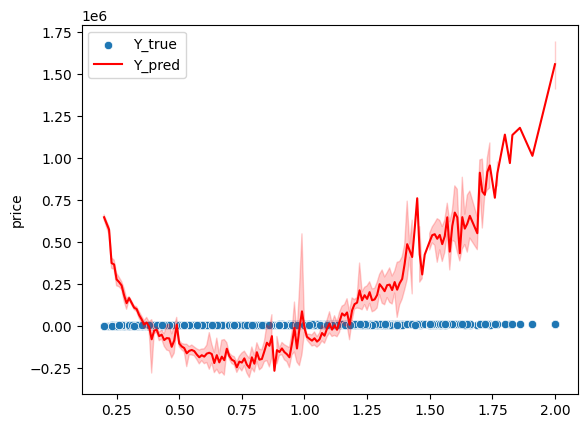

In [113]:
#Plot the actual vs predicted price
sns.scatterplot(x = np.array(X_test['carat']), y = y_test, label ='Y_true')
sns.lineplot(x = np.array(X_test['carat']), y = y_pred, color = 'red', label ='Y_pred')

Loss value

# Part IV: Ridge Regression

Implementation

In [114]:
class RidgeRegressionScratch():
  def __init__(self, alpha = 1.0):
    self.alpha = alpha

  def fit(self, x, y):
    #add bias to w and use w0 for bias
    num_input = x.shape[1]
    I = self.alpha * np.identity(num_input)
    I[0][0] = 0
    self.w = np.linalg.inv(x.T @ x + I) @ (x.T@y)

  def predict(self, x):
    # return x@self.w + self.b
    return x@self.w

  def mse(self, y_true, y_pred):
    a = (y_true - y_pred) ** 2
    return a.mean()

  def score(self, x,y):
    y_pred = self.predict(x)
    score = self.mse(y, y_pred)
    return score

In [115]:
cls = RidgeRegressionScratch(alpha=1.0)
cls.fit(X_train, y_train)
score = cls.score(X_test, y_test)
y_pred = cls.predict(X_test)
print(f'mse = {score})')


mse = 500768.6186758012)


<Axes: ylabel='price'>

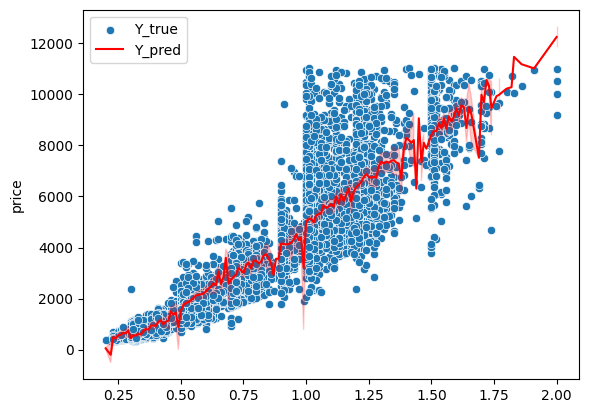

In [116]:
#Plot the actual vs predicted price
sns.scatterplot(x = np.array(X_test['carat']), y = y_test, label ='Y_true')
sns.lineplot(x = np.array(X_test['carat']), y = y_pred, color = 'red', label ='Y_pred')

In [117]:
import pickle
with open('james_jatinjay_assignment1_part3.pickle', 'wb') as file:
  pickle.dump(lr, file)

In [118]:
import pickle
with open('james_jatinjay_assignment1_part4.pickle', 'wb') as file:
  pickle.dump(cls, file)

### References:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
